# Section 2: Data Mining
## Task 1: Data Preprocessing and Exploration
### Dataset: Iris (from scikit-learn)

---

### Step 1: Loading the Dataset

The first step in any data mining project is to **load the dataset** and inspect its structure.  
The Iris dataset contains **150 samples** of iris flowers, each with the following features:

1. Sepal length (cm)  
2. Sepal width (cm)  
3. Petal length (cm)  
4. Petal width (cm)  

The target variable is the **species** of the flower, with three classes:

- Iris-setosa  
- Iris-versicolor  
- Iris-virginica  

We will use **scikit-learn** to load the dataset and **pandas** to convert it into a DataFrame for easier exploration.

---


In [1]:
# Step 1: Loading the Iris dataset

# Import required libraries
import pandas as pd
from sklearn.datasets import load_iris

# Load the Iris dataset from scikit-learn
iris = load_iris()

# Convert feature data to pandas DataFrame
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

# Add the species as a categorical column
iris_df['species'] = pd.Categorical.from_codes(iris.target, iris.target_names)

# Display the first 5 rows of the DataFrame
iris_df.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


***We have completed the load of the data successfully as showcased by the output***

# Step 2: Data Preprocessing

Before performing any analysis or modeling, we need to **preprocess the data**. Preprocessing ensures that the data is clean, consistent, and in a format suitable for machine learning algorithms.  

The preprocessing steps for the Iris dataset are:

1. **Check for missing values**  
   - Missing values can cause errors in analysis or models.  
   - We will check the dataset for any missing entries.

2. **Normalize features using Min-Max Scaling**  
   - Features may have different scales (e.g., sepal length ~5 cm, petal length ~1-6 cm).  
   - Normalization rescales all features to a common range, usually [0, 1].  
   - This is important for algorithms sensitive to feature scale (like KNN, clustering, and neural networks).

3. **Encode the class label if needed**  
   - Some models (like neural networks) require numerical input for labels.  
   - We can convert the categorical species labels to **one-hot encoding** if required.


In [3]:
# Step 2: Data Preprocessing (Corrected)

# Import preprocessing tools
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# 1. Check for missing values
print("Missing values in each column:\n")
print(iris_df.isnull().sum())

# 2. Normalize features using Min-Max scaling
scaler = MinMaxScaler()  # Create a MinMaxScaler object
features = iris_df.columns[:-1]  # All columns except 'species'
iris_df[features] = scaler.fit_transform(iris_df[features])

# Verify normalization
print("\nFirst 5 rows after normalization:\n")
print(iris_df.head())

# 3. Encode class labels using One-Hot Encoding
encoder = OneHotEncoder(sparse_output=False)  # Updated for scikit-learn >=1.2
species_encoded = encoder.fit_transform(iris_df[['species']])

# Convert to DataFrame for clarity
species_df = pd.DataFrame(species_encoded, columns=encoder.categories_[0])
iris_df_encoded = pd.concat([iris_df[features], species_df], axis=1)

print("\nFirst 5 rows with one-hot encoded species:\n")
print(iris_df_encoded.head())

# 4. Save the preprocessed dataset to CSV
iris_df_encoded.to_csv("iris_preprocessed.csv", index=False)
print("\nPreprocessed data saved to 'iris_preprocessed.csv'.")


Missing values in each column:

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

First 5 rows after normalization:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067797          0.041667   
2           0.111111          0.500000           0.050847          0.041667   
3           0.083333          0.458333           0.084746          0.041667   
4           0.194444          0.666667           0.067797          0.041667   

  species  
0  setosa  
1  setosa  
2  setosa  
3  setosa  
4  setosa  

First 5 rows with one-hot encoded species:

   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0           0.222222          0.625000           0.067797          0.041667   
1           0.166667          0.416667           0.067

# Step 2 Output Explanation

---

## 1. Missing Values Check

| Column              | Missing Values |
|---------------------|----------------|
| sepal length (cm)   | 0              |
| sepal width (cm)    | 0              |
| petal length (cm)   | 0              |
| petal width (cm)    | 0              |
| species             | 0              |

- All columns have **0 missing values**, meaning the dataset is **complete and clean**.  
- No imputation or removal of missing data is required.

---

## 2. First 5 Rows After Normalization

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | species |
|-------------------|------------------|-------------------|------------------|---------|
| 0.222222          | 0.625000         | 0.067797          | 0.041667         | setosa  |
| 0.166667          | 0.416667         | 0.067797          | 0.041667         | setosa  |
| 0.111111          | 0.500000         | 0.050847          | 0.041667         | setosa  |
| 0.083333          | 0.458333         | 0.084746          | 0.041667         | setosa  |
| 0.194444          | 0.666667         | 0.067797          | 0.041667         | setosa  |

- All features are now scaled between **0 and 1** using **Min-Max normalization**.  
- This ensures that differences in magnitude between features do not bias certain algorithms.  

---

## 3. First 5 Rows with One-Hot Encoded Species

| sepal length (cm) | sepal width (cm) | petal length (cm) | petal width (cm) | setosa | versicolor | virginica |
|-------------------|------------------|-------------------|------------------|--------|------------|-----------|
| 0.222222          | 0.625000         | 0.067797          | 0.041667         | 1.0    | 0.0        | 0.0       |
| 0.166667          | 0.416667         | 0.067797          | 0.041667         | 1.0    | 0.0        | 0.0       |
| 0.111111          | 0.500000         | 0.050847          | 0.041667         | 1.0    | 0.0        | 0.0       |
| 0.083333          | 0.458333         | 0.084746          | 0.041667         | 1.0    | 0.0        | 0.0       |
| 0.194444          | 0.666667         | 0.067797          | 0.041667         | 1.0    | 0.0        | 0.0       |

- The categorical `species` column has been **converted into three binary columns**.  
- Example: `setosa` = `[1, 0, 0]`, `versicolor` = `[0, 1, 0]`, `virginica` = `[0, 0, 1]`.  

---

## 4. Saving Preprocessed Data

- The processed dataset is saved as **`iris_preprocessed.csv`** for future use.  
- This prevents the need to repeat preprocessing in later analysis.


# Step 3: Data Exploration

Now that the dataset is preprocessed, we perform **exploratory data analysis (EDA)** to better understand its characteristics.  
EDA helps us identify trends, relationships, and anomalies in the dataset before building models.

We will cover:

1. **Summary Statistics**  
   - Using `pandas.DataFrame.describe()` to get the count, mean, standard deviation, min, max, and quartiles.

2. **Pairplot Visualization**  
   - Using `seaborn.pairplot()` to visualize the relationships between features and distinguish species.

3. **Correlation Heatmap**  
   - Using `seaborn.heatmap()` to visualize feature correlations.

4. **Outlier Detection with Boxplots**  
   - Boxplots reveal potential outliers in each feature.


Summary Statistics:

       sepal length (cm)  sepal width (cm)  petal length (cm)  \
count         150.000000        150.000000         150.000000   
mean            0.428704          0.440556           0.467458   
std             0.230018          0.181611           0.299203   
min             0.000000          0.000000           0.000000   
25%             0.222222          0.333333           0.101695   
50%             0.416667          0.416667           0.567797   
75%             0.583333          0.541667           0.694915   
max             1.000000          1.000000           1.000000   

       petal width (cm)  
count        150.000000  
mean           0.458056  
std            0.317599  
min            0.000000  
25%            0.083333  
50%            0.500000  
75%            0.708333  
max            1.000000  


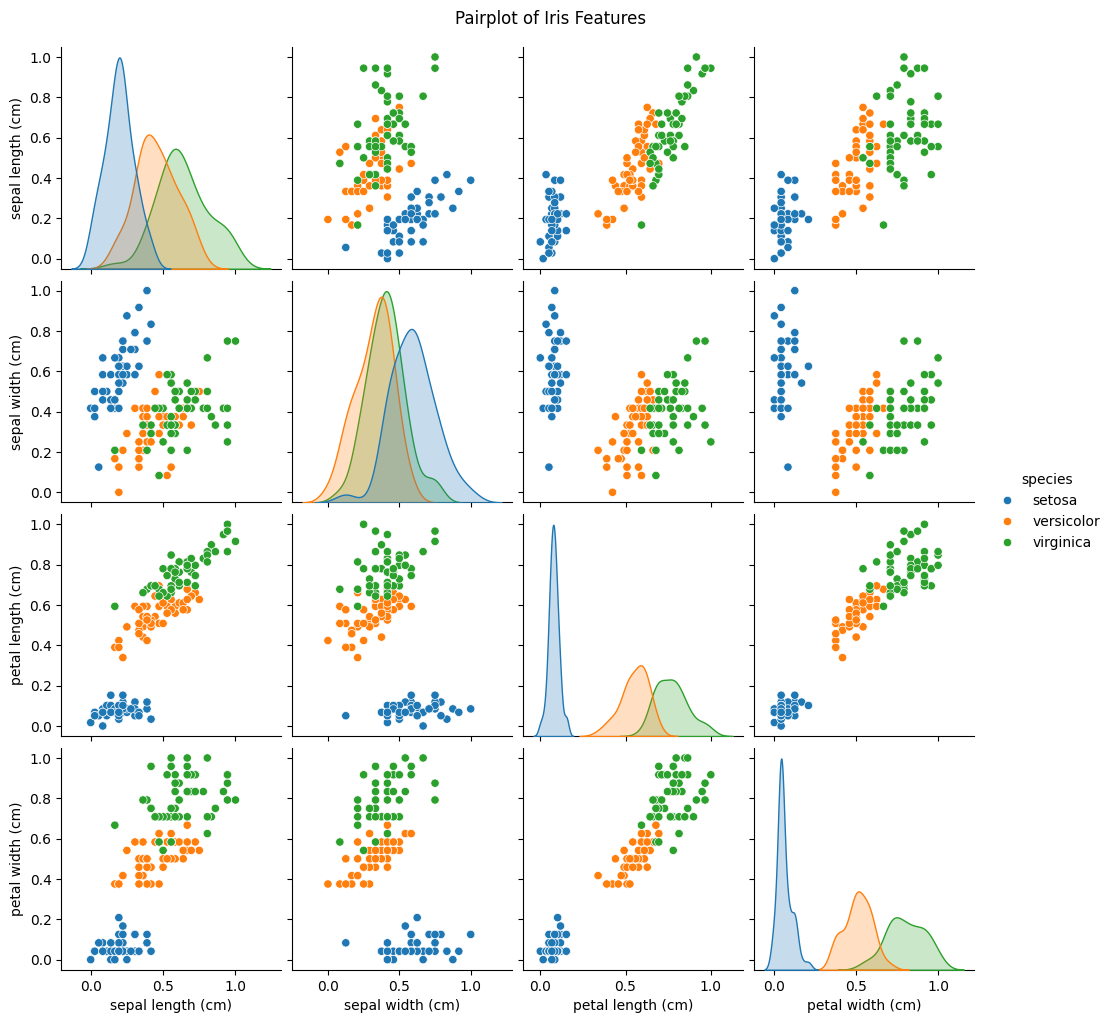

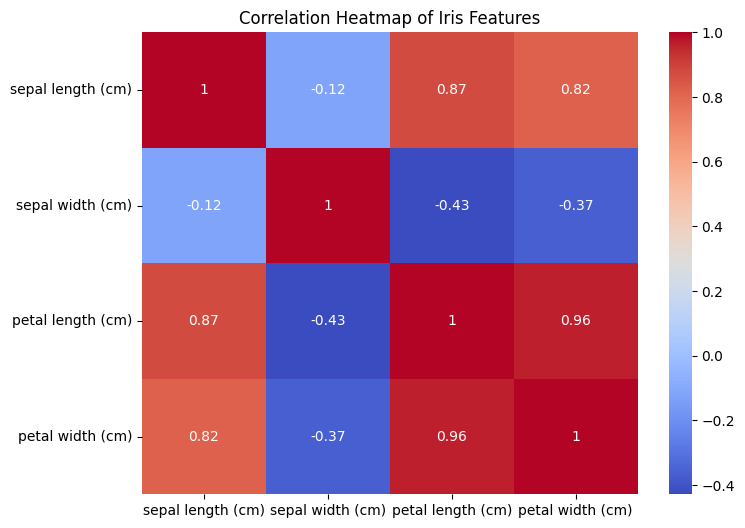

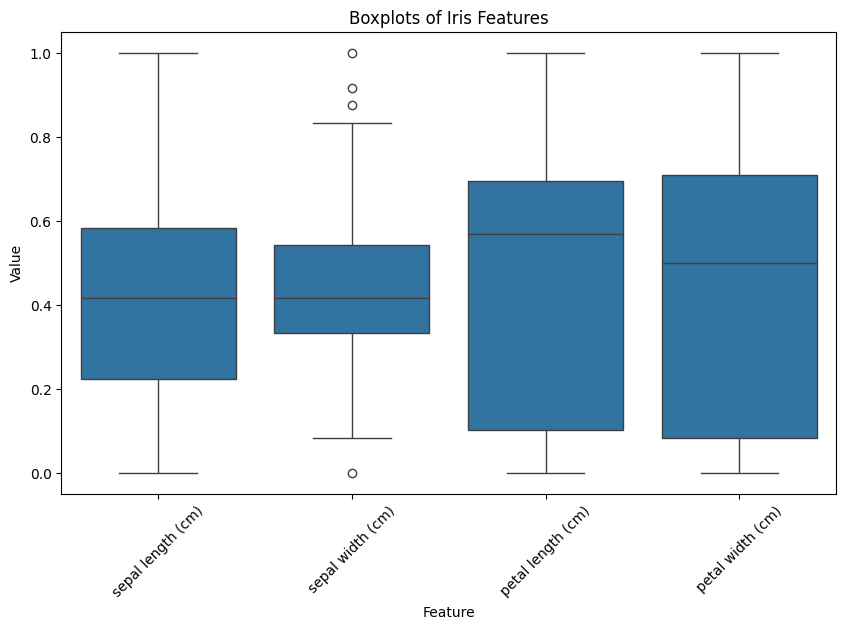

In [4]:
# Step 3: Data Exploration

import seaborn as sns
import matplotlib.pyplot as plt

# 1. Summary statistics
summary_stats = iris_df.describe()
print("Summary Statistics:\n")
print(summary_stats)

# 2. Pairplot visualization
sns.pairplot(iris_df, hue="species")
plt.suptitle("Pairplot of Iris Features", y=1.02)
plt.show()

# 3. Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(iris_df.iloc[:, :-1].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap of Iris Features")
plt.show()

# 4. Boxplots for outlier detection
plt.figure(figsize=(10, 6))
iris_melted = iris_df.melt(id_vars="species", var_name="Feature", value_name="Value")
sns.boxplot(x="Feature", y="Value", data=iris_melted)
plt.xticks(rotation=45)
plt.title("Boxplots of Iris Features")
plt.show()


# Step 3: Data Exploration — Results & Interpretation

After preprocessing the Iris dataset, we explored it using descriptive statistics and visualizations.  
This section interprets the numerical and graphical results in detail.

---

## 1. Summary Statistics

The normalized dataset (after Min-Max scaling) produced the following descriptive statistics:

| Metric | Sepal Length (cm) | Sepal Width (cm) | Petal Length (cm) | Petal Width (cm) |
|--------|-------------------|------------------|-------------------|------------------|
| Count  | 150.000           | 150.000          | 150.000           | 150.000          |
| Mean   | 0.4287             | 0.4406           | 0.4675             | 0.4581           |
| Std    | 0.2300             | 0.1816           | 0.2992             | 0.3176           |
| Min    | 0.0000             | 0.0000           | 0.0000             | 0.0000           |
| 25%    | 0.2222             | 0.3333           | 0.1017             | 0.0833           |
| 50%    | 0.4167             | 0.4167           | 0.5678             | 0.5000           |
| 75%    | 0.5833             | 0.5417           | 0.6949             | 0.7083           |
| Max    | 1.0000             | 1.0000           | 1.0000             | 1.0000           |

**Key Points:**
- **Scaling Impact:** All values are between 0 and 1 because of Min-Max normalization.
- **Spread:** Petal width and length have larger standard deviations, meaning more variation between samples.
- **Medians:** Petal length and width have medians closer to the upper quartile — some species have distinctly larger petals.
- **Distribution shape:** Sepal width has the smallest range after scaling, while petal width varies the most.

---

## 2. Pairplot of Iris Features

**What it Shows:**
- A grid of scatter plots showing pairwise relationships between features, color-coded by species.
- Diagonal plots display the distribution of each feature for each species.

**Observations:**
- **Petal Length vs Petal Width:** Clear separation into three clusters by species — *Setosa* is completely separated, while *Versicolor* and *Virginica* overlap slightly.
- **Sepal Features:** Show much more overlap, especially between *Versicolor* and *Virginica*, making them less useful for classification alone.
- **Distribution Shapes:** Setosa’s petals are very short and narrow, forming a tight cluster; Virginica’s are the largest; Versicolor is in between.

**Implication:** Petal measurements are the most discriminative features for species classification.

---

## 3. Correlation Heatmap

**What it Shows:**
- Pearson correlation coefficients between each pair of features, visualized with a color gradient and numeric labels.

| Feature Pair              | Correlation (r) | Interpretation |
|---------------------------|-----------------|----------------|
| Sepal Length vs Sepal Width | -0.12           | Weak negative relationship — longer sepals tend to be slightly narrower. |
| Sepal Length vs Petal Length | 0.87           | Strong positive — longer sepals tend to have longer petals. |
| Sepal Length vs Petal Width  | 0.82           | Strong positive — longer sepals tend to have wider petals. |
| Sepal Width vs Petal Length  | -0.43           | Moderate negative — wider sepals tend to have shorter petals. |
| Sepal Width vs Petal Width   | -0.37           | Moderate negative — wider sepals tend to have narrower petals. |
| Petal Length vs Petal Width  | 0.96           | Very strong positive — petal length and width scale together almost linearly. |

**Implication:**  
Petal length and width are highly correlated and both strongly separate species — but they may be somewhat redundant in a model.

---

## 4. Boxplots of Features

**What it Shows:**
- Each feature’s distribution (median, quartiles, range, outliers) across all species combined.

**Observations:**
- **Sepal Length:** Wide range — more variability across species.
- **Sepal Width:** Narrower spread, but some outliers.
- **Petal Length & Width:** Show tighter species-specific clustering with fewer extreme values relative to range.

**Implication:**  
Petal measurements have tighter, more distinct distributions, supporting their stronger classification power.

---

## Overall Insights

1. **Feature Importance:**  
   Petal length and width are the most informative features for classification, as shown by strong correlations and clearer visual separation in scatter plots.

2. **Species Separability:**  
   - *Setosa* is easily separable from the other species using petal dimensions alone.  
   - *Versicolor* and *Virginica* are less separable with sepal dimensions but distinguishable with petals.

3. **Modeling Expectation:**  
   A classifier trained on petal features should achieve high accuracy; including sepal features might help slightly but will add noise due to their overlap.

---


## Step 4: Splitting the Dataset into Training and Testing Sets

After preprocessing and exploring the dataset, the next step is to split it into **training** and **testing** subsets.  
This is a crucial step in the machine learning workflow because it allows us to:

1. **Train the model** on one portion of the data (training set).
2. **Evaluate the model** on completely unseen data (testing set), ensuring that our model generalizes well.

---

### Why 80/20 Split?
- **80% Training Set**: Provides enough data for the model to learn patterns effectively.
- **20% Testing Set**: Large enough to give a reliable estimate of the model's performance.

---

### How the Split Works
We use the `train_test_split()` function from **scikit-learn**:
- `X`: Feature matrix (all predictor variables — here: sepal length, sepal width, petal length, petal width).
- `y`: Target vector (the species label, encoded or raw).
- `test_size=0.2`: Allocates 20% of the dataset for testing.
- `random_state`: A fixed seed (integer) to ensure **reproducibility** — the same split will occur each time we run the code.

---

### Expected Output
After splitting, we will have four objects:
1. **X_train** → Features for training.
2. **X_test** → Features for testing.
3. **y_train** → Target labels for training.
4. **y_test** → Target labels for testing.

These will be used in the **model training phase** of the project.


In [7]:
from sklearn.model_selection import train_test_split

# ---------------------------------------
# Step 1: Define features (X) and target (y)
# ---------------------------------------
# We assume 'iris_df' is the preprocessed DataFrame from earlier steps
# Features = all columns except the species label
# Target   = the species column (class labels)
X = iris_df.drop(columns=['species'])
y = iris_df['species']

# ---------------------------------------
# Step 2: Function to split dataset
# ---------------------------------------
def split_data(X, y, test_size=0.2, random_state=42):
    """
    Splits the dataset into training and testing sets.
    
    Parameters:
    -----------
    X : DataFrame or array-like
        Feature matrix (input variables).
    y : Series or array-like
        Target variable (labels).
    test_size : float
        Proportion of the dataset to include in the test split (default 0.2 = 20%).
    random_state : int
        Seed for reproducibility (default 42).

    Returns:
    --------
    X_train : Training features
    X_test  : Testing features
    y_train : Training labels
    y_test  : Testing labels
    """
    X_train, X_test, y_train, y_test = train_test_split(
        X, 
        y, 
        test_size=test_size,       # Percentage for test set
        random_state=random_state, # Ensures reproducibility
        stratify=y                 # Keeps class distribution proportional
    )
    return X_train, X_test, y_train, y_test

# ---------------------------------------
# Step 3: Use the split function
# ---------------------------------------
X_train, X_test, y_train, y_test = split_data(X, y)

# ---------------------------------------
# Step 4: Print split sizes
# ---------------------------------------
print("Training set size:", X_train.shape[0])
print("Testing set size :", X_test.shape[0])


Training set size: 120
Testing set size : 30
